In [2]:
import sys

sys.path.append('/home/juanagreda/anaconda3/lib/python3.8/site-packages')

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

from scipy import stats
import researchpy as rp

In [10]:
df = pd.read_csv('blood_pressure.csv')

In [11]:
df.sample(10)

,patient,sex,agegrp,bp_before,bp_after
100,101,Female,60+,168,178
34,35,Male,46-59,170,151
79,80,Female,30-45,142,135
31,32,Male,46-59,184,139
38,39,Male,46-59,185,140
85,86,Female,46-59,154,146
87,88,Female,46-59,157,136
22,23,Male,46-59,151,136
25,26,Male,46-59,154,160
4,5,Male,30-45,146,141


In [12]:
df.shape

(120, 5)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


## We want to check is whether there's difference in the means before and after intervention is satatistically significant

<AxesSubplot:>

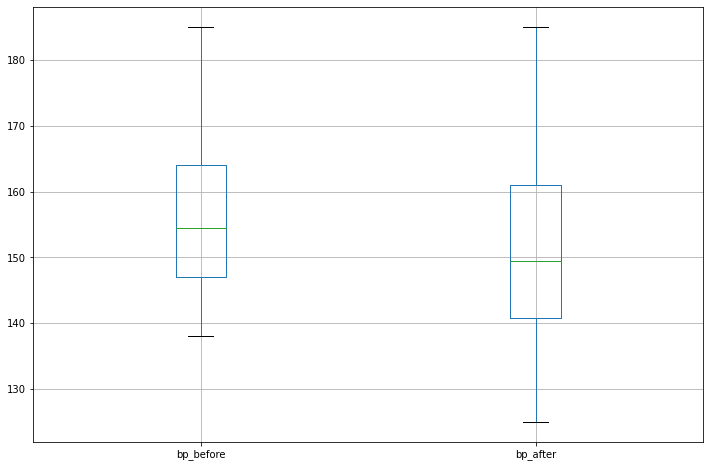

In [19]:
df[['bp_before', 'bp_after']].boxplot(figsize=(12,8))

### We can see means are different, but is this significant?, let's check!

### We will check if the variances are difference between the 2 grps, we use levene test

In [22]:
stats.levene(df['bp_before'], df['bp_after'])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

### p-value = 0.02 < 0.05, reject ho, accept h1, variances are different across these two samples, across our paired samples

In [23]:
df['bp_diff'] = scale(df['bp_before'] - df['bp_after'])

### We standarize the residuals with scale

In [25]:
df[['bp_diff']].sample(10)

,bp_diff
103,-0.305919
113,-1.868061
114,1.075975
24,-0.065590
1,-0.726496
46,-0.125672
16,-1.567649
76,-0.726496
69,-0.125672
51,0.595316


array([[<AxesSubplot:title={'center':'bp_diff'}>]], dtype=object)

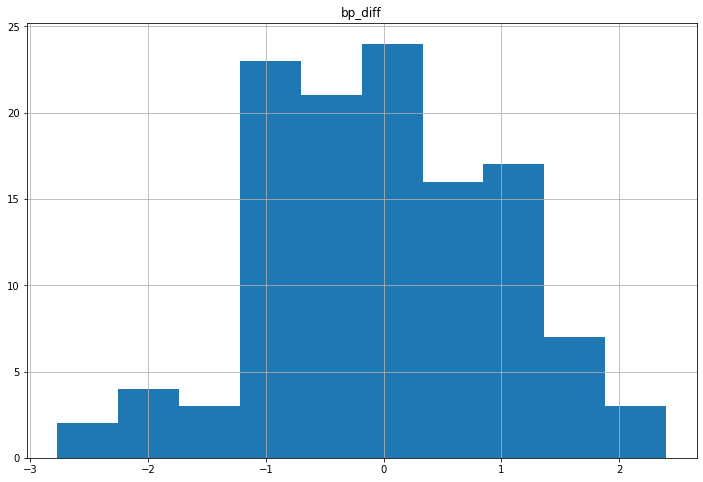

In [26]:
df[['bp_diff']].hist(figsize=(12, 8))

### We can observe that residuals follow normally distribution

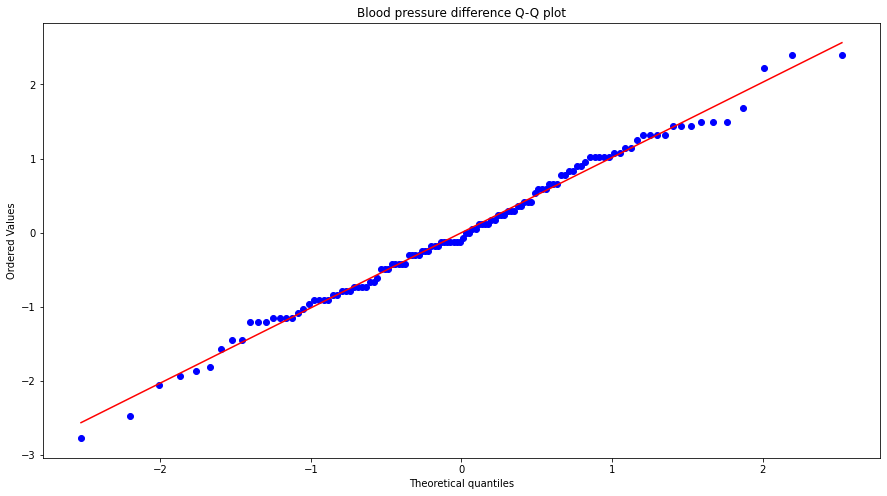

In [27]:
plt.figure(figsize=(15, 8))
stats.probplot(df['bp_diff'], plot=plt)

plt.title('Blood pressure difference Q-Q plot')
plt.show()

### You can see that residuals follow the normal distribution very closely

### Second Assumption

In [31]:
stats.shapiro(df['bp_diff'])

ShapiroResult(statistic=0.992684006690979, pvalue=0.7841646671295166)

### p-value = 0.7 > 0.05, reject h1, accept ho, residuals are normally distribution, shapiro test are not significant

In [33]:
stats.ttest_rel(df['bp_after'], df['bp_before'])

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

### p-value = 0.001 < 0.05, reject ho, accept h1, the different between the medians are significant
### we use .ttest_rel, instead of ttest_ind

In [34]:
rp.ttest(df['bp_after'], df['bp_before'], 
         paired = True, equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,W value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


### Wilconxon signed-rank test shows, p-value = 0.001 < 0.05, reject ho, accept h1, the difference between medians are significant

## the intervention performedhas 